In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
y = [15,13,12.3,12.29,12.27,12.26,12.083,12.256,12.058,12.257,12.199,12.203,12.199,12.155,12.147,12.133,12.121,11.996,11.986,11.977,11.966,11.954,11.94,11.93,11.92,11.91,11.9,11.89,11.88,11.87]
len(x),len(y)

(30, 30)

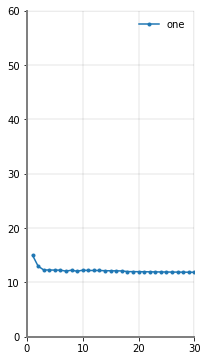

In [3]:
plt.figure(figsize=(3,6))
linewidth_val = 0.1
yscale = [0,10,20,30,40,50,60]
xscale = [0,10,20,30]
for i in xscale:
    plt.axvline(x = i,c='black',linewidth=linewidth_val)
for i in yscale:
    plt.axhline(y = i,c='black',linewidth=linewidth_val)


plt.plot(x,y,'.-',label='one')
plt.ylim(ymax=60,ymin=0)
plt.xlim(xmax=30,xmin=0)
ax=plt.gca();
linewidth_val = 2
ax.spines['bottom'].set_linewidth(linewidth_val);###设置底部坐标轴的粗细
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(linewidth_val);####设置左边坐标轴的粗细
ax.spines['left'].set_color('gray')
linewidth_val = 0.1
ax.spines['right'].set_linewidth(linewidth_val);###设置右边坐标轴的粗细
ax.spines['right'].set_color('gray')
ax.spines['top'].set_linewidth(linewidth_val);####设置上部坐标轴的粗细
ax.spines['top'].set_color('gray')
plt.legend(loc=1,frameon=False)
plt.show()

In [5]:
data = pd.read_excel('损失2.xlsx',engine='openpyxl')
# 砍掉第一行
data = data.drop(index=[0])
data.head()

,x,"y(CNN-L1)(RGB:85,160,251)","y(CNN-LVGG)(RGB:158,115,187)","y(CNN-LAE)(RGB:133,149,108)","y(CDRCNN-L1)(RGB:15,153,178)","y(CDRCNN-LVGG)(RGB:166,83,0)","y(CDRCNN-LAE)(RGB:85,0,0)"
1,2,22.0,15.0,17.0,56.0,39.5,42.0
2,3,21.0,13.0,16.0,54.0,38.0,36.0
3,4,20.0,11.0,14.0,46.0,32.0,30.0
4,5,19.0,10.9,12.8,43.0,30.0,27.0
5,6,18.5,10.8,12.7,41.0,29.0,24.8


In [6]:
# 处理x
x = data['x']

In [12]:
# 处理y
def processY(data):
    def getY(col):
        col = str(col)
        import re # 匹配正则
        if re.match('^y(.*)(RGB:.*)$',col):
            # 删掉y 就剩两个括号了
            col = col[1:]
            # 分割字符串
            vals = col.split('(')
            name,color = vals[1],vals[2]
            name,color = name[0:-1],color[4:-1]   # 去掉右括号,color再去掉RBG:
            return processName(name),str2hex(color)
#     def processName(name): # 如果数字的话，把数字搞成下标
#         if name[-1] == '1' :
#             return name[0:-2]+'$\mathregular{'+name[-2]+'_'+name[-1]+'}$'
#         return name
    def processName(name): # 检测到 -L 之后，剩下的字符都是下标
        for i in range(len(name) - 1):
            if name[i] == '-' and name[i+1] == 'L':
                return name[:i+1]+'$\mathregular{'+name[i+1]+'_{'+name[i+2:]+'}}$'
        return name
    def str2hex(color):
        rgbs = color.split(',')
        color = '#'
        for i in rgbs:
            color = color + str(hex(int(i)))[2:].zfill(2) # 不足两位高位补0
        return color
    columnsName = data.columns.values.tolist()
    names = []
    colors = []
    for col in columnsName:
        if getY(col) != None:
            name,color = getY(col)
            names.append(name)
            colors.append(color)
    return names,colors
processY(data)

(['CNN-$\\mathregular{L_{1}}$',
  'CNN-$\\mathregular{L_{VGG}}$',
  'CNN-$\\mathregular{L_{AE}}$',
  'CDRCNN-$\\mathregular{L_{1}}$',
  'CDRCNN-$\\mathregular{L_{VGG}}$',
  'CDRCNN-$\\mathregular{L_{AE}}$'],
 ['#55a0fb', '#9e73bb', '#85956c', '#0f99b2', '#a65300', '#550000'])

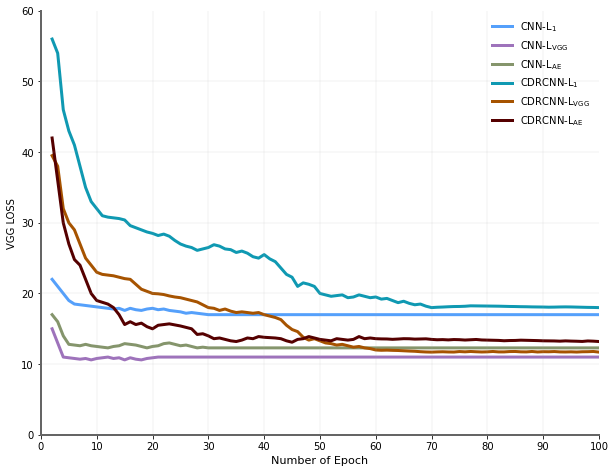

In [16]:
def draw_plot(data):
    names,colors = processY(data)
    x = data['x']
    
    
    plt.figure(figsize=(10,7.8))
    for i in range(len(names)):
        plt.plot(x,data.iloc[:,i+1],color=colors[i],label=names[i],linewidth=3)
        
    xscaleNum = 10
    yscaleNum = 6
    
    yscale = [i*10 for i in range(yscaleNum+1)]
    xscale = [i*10 for i in range(xscaleNum+1)]    
    # 设置坐标轴的刻度
    plt.xticks(xscale)
    plt.yticks(yscale)
    plt.tick_params(labelsize=10)
    
    linewidth_val = 0.2
#     color = 'green'
    color='#A6A6A8' #(191,191,191)
    # 设置背景
    for i in xscale[1:-1]:
        plt.axvline(x = i,c=color,lw=linewidth_val,ls='--')
    for i in yscale[1:-1]:
        plt.axhline(y = i,c=color,lw=linewidth_val,ls='--')
    step = 1
#     for i in range(0,xscaleNum*10,step):
#         for j in range(0,yscaleNum*10,step):
#             plt.scatter(i,j,color=color,s=0.1)    
    plt.ylim(ymax=10*yscaleNum,ymin=0)
    plt.xlim(xmax=10*xscaleNum,xmin=0)
    
    color = '#656565'
    ax=plt.gca();
    
    linewidth_val = 2
    ax.spines['bottom'].set_linewidth(linewidth_val);###设置底部坐标轴的粗细
    ax.spines['bottom'].set_color(color)
    ax.spines['left'].set_linewidth(linewidth_val);####设置左边坐标轴的粗细
    ax.spines['left'].set_color(color)
    linewidth_val = 0
    ax.spines['right'].set_linewidth(linewidth_val);###设置右边坐标轴的粗细
    ax.spines['right'].set_color(None)
    ax.spines['top'].set_linewidth(linewidth_val);####设置上部坐标轴的粗细
    ax.spines['top'].set_color(None)
    
    plt.xlabel('Number of Epoch',size=11.2)
    plt.ylabel('VGG LOSS')
    
    plt.legend(loc=1,frameon=False)
    plt.savefig('scatter.jpg',dpi=600,format='jpg')
    plt.show()
draw_plot(data)

In [17]:
data2 = pd.read_excel('损失1_v2.xlsx',engine='openpyxl')
# 砍掉第一行
data2 = data2.drop(index=[0])
data2.head()

,x,"y(CNN-L1)(RGB:85,160,251)","y(CNN-LVGG)(RGB:158,115,187)","y(CNN-LAE)(RGB:133,149,108)","y(CDRCNN-L1)(RGB:15,153,178)","y(CDRCNN-LVGG)(RGB:166,83,0)","y(CDRCNN-LAE)(RGB:85,0,0)",Unnamed: 7
1,2,75.0,77.0,79.0,100.0,95.0,98.0,NaN
2,3,67.0,69.0,74.0,78.0,85.0,97.5,NaN
3,4,66.0,66.5,71.0,76.0,84.0,97.0,NaN
4,5,65.0,66.2,70.5,74.0,78.0,95.0,NaN
5,6,64.0,68.0,70.0,73.0,80.0,88.0,NaN


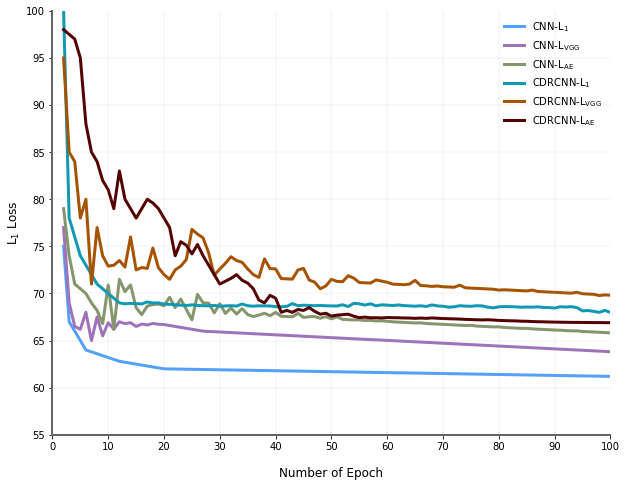

In [18]:
from matplotlib.pyplot import MultipleLocator
def draw_plot2(data):
    names,colors = processY(data)
    x = data['x']
    
    
    plt.figure(figsize=(10,7.8))
    for i in range(len(names)):
        plt.plot(x,data.iloc[:,i+1],color=colors[i],label=names[i],linewidth=3)
        
    xscaleNum = 10
    yscaleNum = 10
    
#     yscale = [i*10 for i in range(5,yscaleNum+1)]
#     yscale.insert(0,55)
    yscale = np.linspace(55,100,10)
    xscale = [i*10 for i in range(xscaleNum+1)]    
    # 设置坐标轴的刻度
    plt.xticks(xscale)
    plt.yticks(yscale)
    plt.tick_params(labelsize=10)
    
    y_major_locator=MultipleLocator(10)
    
    linewidth_val = 0.2
#     color = 'green'
    color='#A6A6A8' #(191,191,191)
    # 设置背景
    for i in xscale[1:-1]:
        plt.axvline(x = i,c=color,lw=linewidth_val,ls='--')
    for i in yscale[:-1]:
        plt.axhline(y = i,c=color,lw=linewidth_val,ls='--')
    step = 1
#     for i in range(0,xscaleNum*10,step):
#         for j in range(0,yscaleNum*10,step):
#             plt.scatter(i,j,color=color,s=0.1)    
    plt.ylim(ymax=10*yscaleNum,ymin=55)
    plt.xlim(xmax=10*xscaleNum,xmin=0)
    
    color = '#656565'
    ax=plt.gca();
    
    linewidth_val = 2
    ax.spines['bottom'].set_linewidth(linewidth_val);###设置底部坐标轴的粗细
    ax.spines['bottom'].set_color(color)
    ax.spines['left'].set_linewidth(linewidth_val);####设置左边坐标轴的粗细
    ax.spines['left'].set_color(color)
    linewidth_val = 0
    ax.spines['right'].set_linewidth(linewidth_val);###设置右边坐标轴的粗细
    ax.spines['right'].set_color(None)
    ax.spines['top'].set_linewidth(linewidth_val);####设置上部坐标轴的粗细
    ax.spines['top'].set_color(None)
    
    plt.xlabel('Number of Epoch',size=12,labelpad=15)
    plt.ylabel('$\mathregular{L_1}$ Loss',size=12)
#     plt.title('$\mathregular{L_1}$ Loss',size=15,x=0.45)
    plt.legend(loc=1,frameon=False)
    plt.savefig('scatter2.jpg',dpi=600,format='jpg')
    plt.show()
draw_plot2(data2)